# Importing Libraries and Modules

In [1]:
import pandas as pd
import numpy as np

# Importing Automobile Insurance Fraud/Amount claim Datasets

In [12]:
amount=pd.read_csv('Auto-Amount.csv')

In [13]:
fraud=pd.read_csv('Auto-Fraud.csv')

In [15]:
amount.columns

Index(['Customer', 'Country', 'State Code', 'State', 'Claim Amount',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [16]:
fraud.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

# 1.Start with Insurance Claim Fraud Prediction Dataset

# 1.1 Data Exploration

In [18]:
#checking number of rows and columns
fraud.shape

(1000, 40)

In [19]:
#checking datatypes
fraud.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [20]:
#column names
fraud.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [22]:
#other informations
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

# ''Statistical Summary of Dataset''

In [23]:
fraud.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


# ''Missing Values detection''

In [24]:
fraud.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [25]:
fraud.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [27]:
fraud=fraud.drop('_c39',axis=1)

In [28]:
fraud.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


# Correlation Analysis

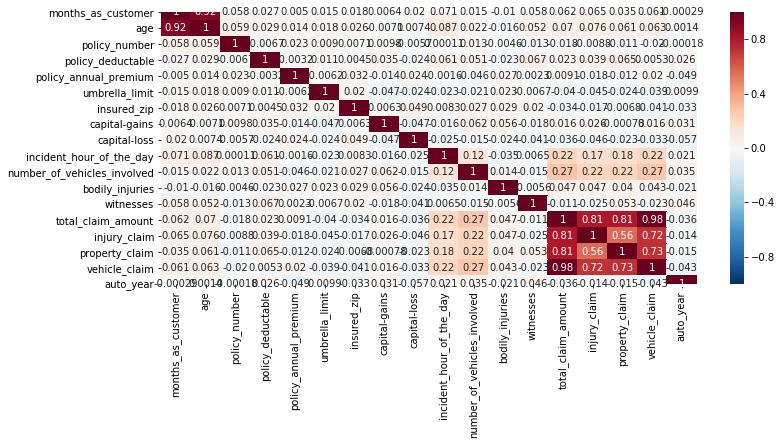

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

correlation = fraud.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [33]:
fraud.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368


In [34]:
fraud.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

# Removing all the variables that are very less correlated with target variable

In [35]:
fraud=fraud.drop('policy_bind_date',axis=1)                


In [36]:
fraud=fraud.drop('policy_state',axis=1)

In [37]:
fraud=fraud.drop('policy_csl',axis=1)

In [38]:
fraud=fraud.drop('insured_sex',axis=1)

In [39]:
fraud=fraud.drop('insured_education_level',axis=1)

In [40]:
fraud=fraud.drop('insured_occupation',axis=1)

In [41]:
fraud=fraud.drop('insured_hobbies',axis=1)

In [42]:
fraud=fraud.drop('insured_relationship',axis=1)

In [44]:
fraud=fraud.drop('incident_date',axis=1)

In [45]:
fraud=fraud.drop('incident_type',axis=1)

In [46]:
fraud=fraud.drop('collision_type',axis=1)

In [47]:
fraud=fraud.drop('incident_severity',axis=1)

In [48]:
fraud=fraud.drop('authorities_contacted',axis=1)

In [49]:
fraud=fraud.drop('incident_state',axis=1)

In [50]:
fraud=fraud.drop('incident_city',axis=1)

In [52]:
fraud=fraud.drop('incident_location',axis=1)

In [55]:
fraud=fraud.drop('property_damage',axis=1)

In [56]:
fraud=fraud.drop('police_report_available',axis=1)

In [57]:
fraud=fraud.drop('auto_make',axis=1)

In [58]:
fraud=fraud.drop('auto_model',axis=1)

In [59]:
fraud.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
capital-gains                    int64
capital-loss                     int64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
total_claim_amount               int64
injury_claim                     int64
property_claim                   int64
vehicle_claim                    int64
auto_year                        int64
fraud_reported                  object
dtype: object

In [60]:
fraud.head()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004,Y
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007,Y
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007,N
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014,Y
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009,N


In [61]:
fraud.shape

(1000, 19)

# Label Encoding 

In [64]:
#LabelEnconding the Categorical Data'''
from sklearn.preprocessing import LabelEncoder
fraud['fraud_reported'] = LabelEncoder().fit_transform(fraud['fraud_reported'])

In [65]:
fraud['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

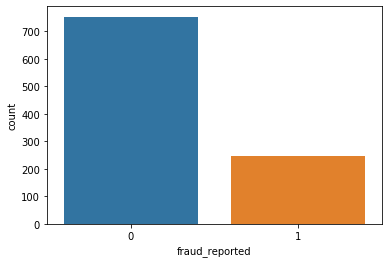

In [66]:
sns.countplot(fraud['fraud_reported'])

# Now performing Train_Test_Split to separate target and input variables

In [67]:
from sklearn.model_selection import train_test_split

In [69]:
fraud.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [70]:
#Learning Features and Predicting Features'''
x_train = fraud.drop(['fraud_reported'], axis = 1)
y_train = fraud['fraud_reported']

In [86]:
'''Train Test Split , 70:30 Ratio'''
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.20, random_state=42)

In [87]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((536, 18), (134, 18), (536,), (134,))

# Applying Standardiztion Technique to get optimized results through Standard Scaler

In [88]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# Model Selection

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier

In [90]:
model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]

In [91]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n ')

0.746268656716418
[[99  1]
 [33  1]]
              precision    recall  f1-score   support

           0       0.75      0.99      0.85       100
           1       0.50      0.03      0.06        34

    accuracy                           0.75       134
   macro avg       0.62      0.51      0.45       134
weighted avg       0.69      0.75      0.65       134


 
0.6865671641791045
[[84 16]
 [26  8]]
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       100
           1       0.33      0.24      0.28        34

    accuracy                           0.69       134
   macro avg       0.55      0.54      0.54       134
weighted avg       0.65      0.69      0.67       134


 
0.746268656716418
[[100   0]
 [ 34   0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.85       100
           1       0.00      0.00      0.00        34

    accuracy                           0.75       134
   mac

In [94]:
#Creating Object of SVM'''
from sklearn import svm

svmModel = svm.SVC(kernel='rbf', C=1, gamma=100) 
#Learning from Training Set'''
svmModel.fit(x_train, y_train)
#Predicting for Training Set'''
Y_pred = svmModel.predict(x_test)
#Accuracy Score'''
result_acc = accuracy_score(y_test,Y_pred)

In [96]:
result_acc

0.746268656716418

In [97]:
svc = SVC()
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)

In [98]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.75      1.00      0.85       100
           1       0.00      0.00      0.00        34

    accuracy                           0.75       134
   macro avg       0.37      0.50      0.43       134
weighted avg       0.56      0.75      0.64       134



# Storing the predicted results in csv file

In [99]:
pred_svm = pd.DataFrame(Y_pred, columns=['y_pred']).to_csv('Auto_Fraud_Detection.csv')

# Saving the best Model as a pickle in a file

In [103]:
from sklearn.externals import joblib

In [104]:
joblib.dump(svc,'Auto_Fraud_Detection.pkl')

['Auto_Fraud_Detection.pkl']

# 2.Second is Automobile Insurance Amount Claimed Dataset

In [105]:
amount.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


# ''Data Exploration''

In [107]:
#checking number of rows and columns
amount.shape

(9134, 26)

In [108]:
#checking datatypes of columns
amount.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class   

In [109]:
#other information
amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
Customer                         9134 non-null object
Country                          9134 non-null object
State Code                       9134 non-null object
State                            9134 non-null object
Claim Amount                     9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception  

# Statistical Analysis

In [110]:
amount.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


# Missing Values Detection

In [111]:
amount.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

no missing values.

# Correlation Analysis

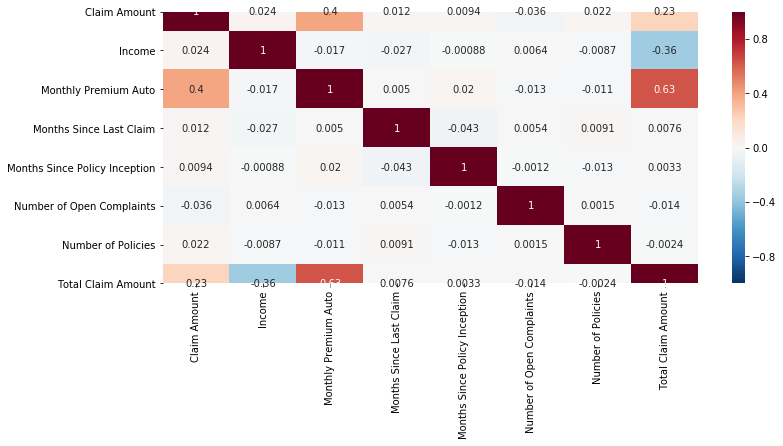

In [113]:
correlation = amount.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

# Univariate and Bivariate Analysis

In [115]:
amount.columns

Index(['Customer', 'Country', 'State Code', 'State', 'Claim Amount',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [116]:
amount.head(2)

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize


In [117]:
amount['Country'].unique()

array(['US'], dtype=object)

In [118]:
#there is only one country hence deleting this column
amount=amount.drop('Country',axis=1)

In [119]:
amount=amount.drop('Customer',axis=1)

In [120]:
amount['Response'].unique()

array(['No', 'Yes'], dtype=object)

In [121]:
amount['Coverage'].unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [123]:
amount['Education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [124]:
amount['EmploymentStatus'].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [125]:
amount.shape

(9134, 24)

# Preprocessing,Label Encoding

In [127]:
from sklearn.preprocessing import LabelEncoder

In [129]:
'''LabelEnconding the Categorical Data'''
amount['EmploymentStatus'] = LabelEncoder().fit_transform(amount['EmploymentStatus'])

In [131]:
amount['Education']=LabelEncoder().fit_transform(amount['Education'])

In [132]:
amount['Coverage']=LabelEncoder().fit_transform(amount['Coverage'])

In [133]:
amount['Response']=LabelEncoder().fit_transform(amount['Response'])

In [134]:
amount.dtypes

State Code                        object
State                             object
Claim Amount                     float64
Response                           int32
Coverage                           int32
Education                          int32
Effective To Date                 object
EmploymentStatus                   int32
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [135]:
amount=amount.drop(['State Code','State','Effective To Date','Location Code'],axis=1)

In [136]:
amount.dtypes

Claim Amount                     float64
Response                           int32
Coverage                           int32
Education                          int32
EmploymentStatus                   int32
Gender                            object
Income                             int64
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [137]:
amount['Gender']=LabelEncoder().fit_transform(amount['Gender'])

In [138]:
amount['Marital Status']=LabelEncoder().fit_transform(amount['Marital Status'])

In [139]:
amount['Policy Type']=LabelEncoder().fit_transform(amount['Policy Type'])

In [140]:
amount['Policy'].unique()

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

In [141]:
amount['Policy']=LabelEncoder().fit_transform(amount['Policy'])

In [142]:
amount['Claim Reason']=LabelEncoder().fit_transform(amount['Claim Reason'])

In [143]:
amount['Sales Channel']=LabelEncoder().fit_transform(amount['Sales Channel'])

In [144]:
amount['Vehicle Class']=LabelEncoder().fit_transform(amount['Vehicle Class'])

In [145]:
amount['Vehicle Size']=LabelEncoder().fit_transform(amount['Vehicle Size'])

In [146]:
amount.dtypes

Claim Amount                     float64
Response                           int32
Coverage                           int32
Education                          int32
EmploymentStatus                   int32
Gender                             int32
Income                             int64
Marital Status                     int32
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                        int32
Policy                             int32
Claim Reason                       int32
Sales Channel                      int32
Total Claim Amount               float64
Vehicle Class                      int32
Vehicle Size                       int32
dtype: object

# train-test-split

In [148]:
'''Learning Features and Predicting Features'''
x_train = amount.drop(['Total Claim Amount'], axis = 1)
y_train = amount['Total Claim Amount']

In [151]:
'''Train Test Split , 70:30 Ratio'''
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.20, random_state=42)

In [152]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4895, 19), (1224, 19), (4895,), (1224,))

# Applying Standardiztion Technique to get optimized results through Standard Scaler

In [153]:
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# Applying various Machine Learning Models to Train and test the Dataset

In [155]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso

from sklearn.model_selection import cross_val_score


In [156]:
from sklearn.metrics import r2_score
model= [
    Lasso(alpha=0.1),
    Ridge(alpha=.5),
    
    RandomForestRegressor( random_state=0, n_estimators=300)
]
 

In [158]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred=m.predict(x_test)
    print('mean absolute error ',(mean_absolute_error(y_test,pred)))
    print('mean squared error ',(mean_squared_error(y_test,pred)))
    print("root mean squared error " ,np.sqrt(mean_squared_error(y_test,pred)))
    print('\n')

mean absolute error  133.35355893292552
mean squared error  32650.427278695737
root mean squared error  180.69429232462141


mean absolute error  133.41505375895747
mean squared error  32662.423455516466
root mean squared error  180.7274839517124


mean absolute error  118.64362871106208
mean squared error  29800.96685218296
root mean squared error  172.62956540576403




# Hyper Parameter Tuning

In [159]:
rf=RandomForestRegressor(n_estimators=300,random_state=0)

In [160]:
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [161]:
rf.score(x_train,y_train)

0.9472448477257706

In [163]:
pred=rf.predict(x_test)
pred

array([ 538.1377781 ,  396.40445021,  357.26223488, ...,  452.44855208,
        419.62566796, 1028.89029183])

In [164]:
print('mean absolute error ',(mean_absolute_error(y_test,pred)))
print('mean squared error ',(mean_squared_error(y_test,pred)))
print("root mean squared error " ,np.sqrt(mean_squared_error(y_test,pred)))

mean absolute error  118.64362871106208
mean squared error  29800.96685218296
root mean squared error  172.62956540576403


In [165]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.6199661973065271


# Cross Validation Score on Random Forest Regressor

In [166]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rf, X = x_train, y = y_train, cv = 10)
rfc_eval.mean()

0.6126837465465849

In [168]:
print(r2_score(y_test,pred))

0.6199661973065271


# Storing the predicted results in csv file

In [169]:
pred=pd.DataFrame(pred,columns=['pred']).to_csv('Auto_Amount.csv')

# Saving the best Model as a pickle in a file

In [170]:
from sklearn.externals import joblib

In [171]:
joblib.dump(rf,'Auto_Amount.pkl')

['Auto_Amount.pkl']